# Business Problem 1

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib inline creates a plot in the notebook output
import seaborn # Improves the look of graphs
import numpy as np

%matplotlib inline

In [4]:
# Get reference to Data
df = pd.read_csv('Retail_Sales.csv', encoding = 'latin1')
df.head()

,Region,Country,Category,Sales Channel,Order Priority,Salesperson,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,Peter,10/18/2014,686800706,10/31/2014,8446.0,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,Susan,11/07/2011,185941302,12/08/2011,3018.0,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,Laura,10/31/2016,246222341,12/09/2016,1517.0,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,Malcolm,04/10/2010,161442649,05/12/2010,3322.0,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,Larry,8/16/2011,645713555,8/31/2011,9845.0,9.33,6.92,91853.85,68127.40,23726.45


In [5]:
# See Data Types
df.dtypes

Region             object
Country            object
Category           object
Sales Channel      object
Order Priority     object
Salesperson        object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
# Check where colums have null
df.isnull().sum()

Region            0
Country           0
Category          0
Sales Channel     0
Order Priority    0
Salesperson       0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        4
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# Q1. Clean Data

In [7]:
df['Units Sold'].fillna((df['Units Sold'].mean()), inplace=True)

In [8]:
# Check missing values have been filled
df.isnull().sum()

Region            0
Country           0
Category          0
Sales Channel     0
Order Priority    0
Salesperson       0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# Q2. Top 2 Countries by "Total Revenue" according to each "Category"

In [16]:
grouped_countries_by_category = df.groupby(["Category", "Country"]).sum()
total_revenue_country_by_category = grouped_countries_by_category["Total Revenue"].groupby(level = 0, group_keys = False)

total_revenue_country_by_category.nlargest(2)

Category         Country         
Baby Food        Niger                5583484.16
                 Luxembourg           4159277.04
Beverages        Mongolia              883281.75
                 Bahrain               822640.65
Cereal           Czech Republic       2962285.70
                 Liechtenstein        2875274.60
Clothes          Qatar                1803229.28
                 Cuba                 1651985.76
Cosmetics        Panama               7030613.20
                 Japan                5019056.00
Fruits           Bahrain               220402.59
                 Zimbabwe              218014.11
Household        Papua New Guinea    18351362.47
                 Ghana               10274651.25
Meat             Guinea               7724384.01
                 Chad                 7253554.77
Office Supplies  Portugal            12548165.49
                 Costa Rica          11872860.72
Personal Care    Solomon Islands      1825112.63
                 Indonesia         

# Q3. Which Sales person sold the most in 2014 per category?

In [161]:
# Convert "Order date" from "object" to "date time" data type
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format = True)
df.head(4)

,Region,Country,Category,Sales Channel,Order Priority,Salesperson,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,Peter,2014-10-18,686800706,10/31/2014,8446.0,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,Susan,2011-11-07,185941302,12/08/2011,3018.0,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,Laura,2016-10-31,246222341,12/09/2016,1517.0,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,Malcolm,2010-04-10,161442649,05/12/2010,3322.0,205.70,117.11,683335.40,389039.42,294295.98


In [162]:
# Filter data where "Order Date" is in 2014 only
orders_2014 = df[(df["Order Date"] >= "2014-01-01") & (df["Order Date"] < "2015-01-01")]
orders_2014.head(4)

,Region,Country,Category,Sales Channel,Order Priority,Salesperson,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,Peter,2014-10-18,686800706,10/31/2014,8446.0,437.20,263.33,3692591.20,2224085.18,1468506.02
5,Europe,Armenia,Cereal,Online,H,Peter,2014-11-24,683458888,12/28/2014,9528.0,205.70,117.11,1959909.60,1115824.08,844085.52
18,Sub-Saharan Africa,Cape Verde,Clothes,Online,C,Susan,2014-09-08,821912801,10/03/2014,1117.0,109.28,35.84,122065.76,40033.28,82032.48
26,Sub-Saharan Africa,Senegal,Beverages,Offline,M,Malcolm,2014-10-22,683927953,11/04/2014,8334.0,47.45,31.79,395448.30,264937.86,130510.44


In [168]:
# Top "Salesperson" in each "Category" by "Total Revenue" 
grouped_salesperson_by_category = orders_2014.groupby(["Category", "Salesperson"]).sum()
total_revenue_country_by_salesperson = grouped_salesperson_by_category["Total Revenue"].groupby(level = 0, group_keys = False)

total_revenue_country_by_salesperson.nlargest(1)

Category         Salesperson
Baby Food        Laura           6059070.80
Beverages        Larry           2039258.65
Cereal           Peter           4477266.20
Clothes          Larry           1324801.44
Cosmetics        Larry          12350900.00
Fruits           Larry            179845.08
Household        Laura          21126687.78
Meat             Malcolm         7284352.74
Office Supplies  Larry          11265281.79
Personal Care    Peter           1208541.51
Snacks           Laura           2140087.08
Vegetables       Malcolm         7602706.94
Name: Total Revenue, dtype: float64

# Q4. Calculate "Total Profit" for each order.

In [183]:
# Total profit column already found in data

# Show sum of "Total Profit" for each region (highest first)
region_profit = df[['Region', 'Total Profit']]
region_profit_grouped = region_profit.groupby(['Region']).sum().sort_values('Total Profit', ascending = False)

region_profit_grouped.head(10)

,Total Profit
Region,
Europe,1.067720e+08
Sub-Saharan Africa,1.016510e+08
Middle East and North Africa,5.105699e+07
Asia,5.079940e+07
Central America and the Caribbean,4.133678e+07
Australia and Oceania,3.187842e+07
North America,7.708059e+06


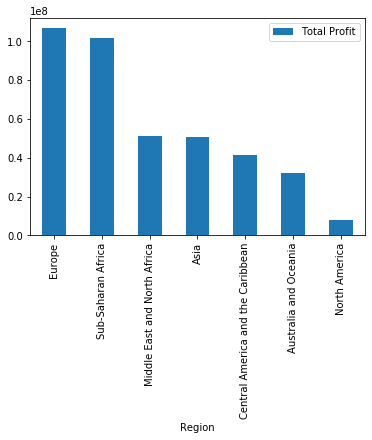

In [189]:
# Region "Total Profit" bar chart. Sorted by "Total Profit"
region_profit_grouped.plot(kind = 'bar')

# Q5. Using a pivot table.
## Show the "Sum" and "Mean" of "Salesperson" in terms of "Total Revenue" and "Priority"

In [195]:
# Set up pivot table
pd.pivot_table(
    df,
    index = ['Salesperson', 'Order Priority'],
    values = ['Total Revenue'],
    aggfunc = [np.sum, np.mean], 
    margins = True
    ).round(2)

sum          mean
                           Total Revenue Total Revenue
Salesperson Order Priority                            
Larry       C               4.770341e+07    1403041.56
            H               6.100599e+07    1326217.13
            L               8.747880e+07    1267808.66
            M               7.006710e+07    1347444.25
Laura       C               9.084433e+07    1465231.20
            H               7.391178e+07    1572591.08
            L               6.915685e+07    1257397.23
            M               5.598735e+07    1217116.26
Malcolm     C               8.414626e+07    1357197.67
            H               6.031654e+07    1283330.59
            L               6.296915e+07    1368894.60
            M               7.244832e+07    1393236.90
Peter       C               6.533504e+07    1126466.23
            H               7.808899e+07    1369982.21
            L               8.071596e+07    1391654.47
            M               7.975684e+07    1476978.56
Susan       C               4.773277e+07    1037668.86
            H               3.315060e+07    1069374.19
            L               6.147500e+07    1536875.06
            M               4.503077e+07    1185020.20
All                         1.327322e+09    1327321.84

# Q6. Find "Europe" sales
## That were sold though the "Offline" channel & "Units Sold" greater than 9000

In [20]:
# Filter data
filted_europe_sales = df[ 
    (df["Region"] == "Europe") & 
    (df["Sales Channel"] == "Offline") & 
    (df["Units Sold"] > 9000)
    ]
filted_europe_sales.head()

,Region,Country,Category,Sales Channel,Order Priority,Salesperson,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
146,Europe,Serbia,Snacks,Offline,C,Peter,9/20/2013,547748982,10/14/2013,9951.0,152.58,97.44,1518323.58,969625.44,548698.14
216,Europe,Belgium,Fruits,Offline,L,Peter,10/19/2010,674808442,10/24/2010,9669.0,9.33,6.92,90211.77,66909.48,23302.29
310,Europe,Switzerland,Clothes,Offline,H,Susan,06/09/2017,763920438,07/10/2017,9888.0,109.28,35.84,1080560.64,354385.92,726174.72
345,Europe,Luxembourg,Baby Food,Offline,H,Susan,6/30/2011,393620669,08/02/2011,9958.0,255.28,159.42,2542078.24,1587504.36,954573.88
360,Europe,Lithuania,Cereal,Offline,M,Susan,12/19/2013,986442506,01/01/2014,9113.0,205.70,117.11,1874544.10,1067223.43,807320.67


# Q7. Plot any graph that would help Retail Ltd management better interpret their sales data

In [251]:
# Group data by "Order Date" year
plot_columns = df[["Order Date", "Total Revenue", "Total Profit", "Total Cost"]]
sales_per_year = plot_columns.groupby(plot_columns['Order Date'].map(lambda x: x.year)).sum()

sales_per_year.head()

,Total Revenue,Total Profit,Total Cost
Order Date,,,
2010,1.754622e+08,52929570.30,1.225326e+08
2011,1.499280e+08,43634278.43,1.062937e+08
2012,1.763914e+08,50500113.85,1.258913e+08
2013,1.897973e+08,53775795.83,1.360215e+08
2014,1.950758e+08,58053499.20,1.370223e+08


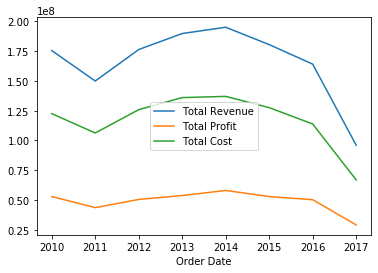

In [252]:
# Plot of "Total Profit" and "Total Cost" from year to year
sales_per_year.plot(kind = 'line')